In [98]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings("ignore") #Ignore certain system-wide alerts

In [134]:
df = pd.read_csv('../data/input/Telecom_customer churn.csv')
print('データ数は{}、変数は{}種類です'.format(df.shape[0], df.shape[1]))

データ数は100000、変数は100種類です


In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 100 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   rev_Mean          99643 non-null   float64
 1   mou_Mean          99643 non-null   float64
 2   totmrc_Mean       99643 non-null   float64
 3   da_Mean           99643 non-null   float64
 4   ovrmou_Mean       99643 non-null   float64
 5   ovrrev_Mean       99643 non-null   float64
 6   vceovr_Mean       99643 non-null   float64
 7   datovr_Mean       99643 non-null   float64
 8   roam_Mean         99643 non-null   float64
 9   change_mou        99109 non-null   float64
 10  change_rev        99109 non-null   float64
 11  drop_vce_Mean     100000 non-null  float64
 12  drop_dat_Mean     100000 non-null  float64
 13  blck_vce_Mean     100000 non-null  float64
 14  blck_dat_Mean     100000 non-null  float64
 15  unan_vce_Mean     100000 non-null  float64
 16  unan_dat_Mean     10

In [136]:
df.head(10)

rev_Mean  mou_Mean  totmrc_Mean  da_Mean  ovrmou_Mean  ovrrev_Mean  \
0   23.9975    219.25       22.500   0.2475         0.00         0.00   
1   57.4925    482.75       37.425   0.2475        22.75         9.10   
2   16.9900     10.25       16.990   0.0000         0.00         0.00   
3   38.0000      7.50       38.000   0.0000         0.00         0.00   
4   55.2300    570.50       71.980   0.0000         0.00         0.00   
5   82.2750   1312.25       75.000   1.2375         0.00         0.00   
6   17.1450      0.00       16.990   0.0000         0.00         0.00   
7   38.0525    682.50       52.490   0.2475         0.00         0.00   
8   97.3375   1039.00       50.000   4.9500       419.50        41.95   
9   31.6625     25.50       29.990   0.2475         0.00         0.00   

   vceovr_Mean  datovr_Mean  roam_Mean  change_mou  ...  forgntvl  ethnic  \
0         0.00          0.0        0.0     -157.25  ...       0.0       N   
1         9.10          0.0        0.0      532.25  ...       0.0       Z   
2         0.00          0.0        0.0       -4.25  ...       0.0       N   
3         0.00          0.0        0.0       -1.50  ...       0.0       U   
4         0.00          0.0        0.0       38.50  ...       0.0       I   
5         0.00          0.0        0.0      156.75  ...       0.0       U   
6         0.00          0.0        0.0        0.00  ...       0.0       N   
7         0.00          0.0        0.0      147.50  ...       1.0       S   
8        41.95          0.0        0.0      198.00  ...       0.0       F   
9         0.00          0.0        0.0       59.50  ...       1.0       N   

   kid0_2  kid3_5  kid6_10  kid11_15  kid16_17  creditcd  eqpdays  Customer_ID  
0       U       U        U         U         U         Y    361.0      1000001  
1       U       U        U         U         U         Y    240.0      1000002  
2       U       Y        U         U         U         Y   1504.0      1000003  
3       Y       U        U         U         U         Y   1812.0      1000004  
4       U       U        U         U         U         Y    434.0      1000005  
5       U       U        U         U         U         Y    458.0      1000006  
6       U       U        U         U         U         Y    852.0      1000007  
7       U       U        U         U         U         Y    231.0      1000008  
8       U       U        U         U         U         N    700.0      1000009  
9       U       U        U         U         U         Y    601.0      1000010  

[10 rows x 100 columns]

欠損値を確認する

In [137]:
# Features with missing values
miss = df.isnull().sum().sort_values(ascending = False).head(44)
miss_per = (miss/len(df))*100

# Percentage of missing values
pd.DataFrame({'No. missing values': miss, '% of missing data': miss_per.values})

No. missing values  % of missing data
numbcars                       49366             49.366
dwllsize                       38308             38.308
HHstatin                       37923             37.923
ownrent                        33706             33.706
dwlltype                       31909             31.909
lor                            30190             30.190
income                         25436             25.436
adults                         23019             23.019
infobase                       22079             22.079
hnd_webcap                     10189             10.189
prizm_social_one                7388              7.388
avg6rev                         2839              2.839
avg6mou                         2839              2.839
avg6qty                         2839              2.839
ethnic                          1732              1.732
rv                              1732              1.732
marital                         1732              1.732
forgntvl                        1732              1.732
kid0_2                          1732              1.732
kid3_5                          1732              1.732
kid6_10                         1732              1.732
kid16_17                        1732              1.732
creditcd                        1732              1.732
truck                           1732              1.732
kid11_15                        1732              1.732
change_rev                       891              0.891
change_mou                       891              0.891
hnd_price                        847              0.847
mou_Mean                         357              0.357
rev_Mean                         357              0.357
da_Mean                          357              0.357
datovr_Mean                      357              0.357
totmrc_Mean                      357              0.357
ovrmou_Mean                      357              0.357
ovrrev_Mean                      357              0.357
vceovr_Mean                      357              0.357
roam_Mean                        357              0.357
area                              40              0.040
refurb_new                         1              0.001
dualband                           1              0.001
phones                             1              0.001
models                             1              0.001
eqpdays                            1              0.001
avgrev                             0              0.000

TARGETとしてchun（解約の有無）がどのようなデータかを確認する。

num of pepole who stay: 50326
num of pepole who churn: 49317


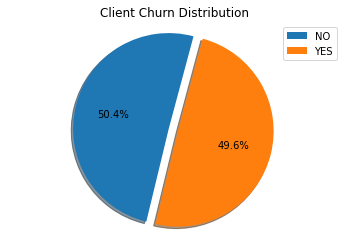

In [138]:
stay = df[(df['churn'] ==0) ].count()[1]
churn = df[(df['churn'] ==1) ].count()[1]
print ("num of pepole who stay: "+ str(stay))
print ("num of pepole who churn: "+ str(churn))

# ratio of those who churn and those who don't
sizes = [48401,47647]
labels='NO','YES'
explode = (0, 0.1)  
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode,autopct='%1.1f%%',shadow=True, startangle=75 )
ax1.axis('equal') 
ax1.set_title("Client Churn Distribution")

ax1.legend(labels)

plt.show()

ほぼ、1:1の割合であり、均衡データであることがわかる。

まず、LightGBMで、どのような特徴量がchurnの予測に重要であるかを調べることにする。

In [139]:
def columns_categories(data_set):
    object_columns = []
    float_columns = []
    int_columns = []
    other_columns = []
    n,m,s=0,0,0
    for i in data_set.columns.values:
        if data_set[i].dtypes=='object':
            object_columns.append(i)
            n+=1
        if data_set[i].dtypes=='int':
            int_columns.append(i)
            m+=1
        if data_set[i].dtypes=='float':
            float_columns.append(i)
            s+=1
    print('object(',n,'):\n',object_columns)
    print('int(',m,'):\n',int_columns)
    print('float(',s,'):\n',float_columns)

In [140]:
columns_categories(df)

object( 21 ):
 ['new_cell', 'crclscod', 'asl_flag', 'prizm_social_one', 'area', 'dualband', 'refurb_new', 'hnd_webcap', 'ownrent', 'dwlltype', 'marital', 'infobase', 'HHstatin', 'dwllsize', 'ethnic', 'kid0_2', 'kid3_5', 'kid6_10', 'kid11_15', 'kid16_17', 'creditcd']
int( 10 ):
 ['churn', 'months', 'uniqsubs', 'actvsubs', 'totcalls', 'adjqty', 'avg3mou', 'avg3qty', 'avg3rev', 'Customer_ID']
float( 69 ):
 ['rev_Mean', 'mou_Mean', 'totmrc_Mean', 'da_Mean', 'ovrmou_Mean', 'ovrrev_Mean', 'vceovr_Mean', 'datovr_Mean', 'roam_Mean', 'change_mou', 'change_rev', 'drop_vce_Mean', 'drop_dat_Mean', 'blck_vce_Mean', 'blck_dat_Mean', 'unan_vce_Mean', 'unan_dat_Mean', 'plcd_vce_Mean', 'plcd_dat_Mean', 'recv_vce_Mean', 'recv_sms_Mean', 'comp_vce_Mean', 'comp_dat_Mean', 'custcare_Mean', 'ccrndmou_Mean', 'cc_mou_Mean', 'inonemin_Mean', 'threeway_Mean', 'mou_cvce_Mean', 'mou_cdat_Mean', 'mou_rvce_Mean', 'owylis_vce_Mean', 'mouowylisv_Mean', 'iwylis_vce_Mean', 'mouiwylisv_Mean', 'peak_vce_Mean', 'peak_dat_

In [141]:
# カテゴリカル変数を抽出
obj_col = df.select_dtypes(include = 'object').columns
obj_col

Index(['new_cell', 'crclscod', 'asl_flag', 'prizm_social_one', 'area',
       'dualband', 'refurb_new', 'hnd_webcap', 'ownrent', 'dwlltype',
       'marital', 'infobase', 'HHstatin', 'dwllsize', 'ethnic', 'kid0_2',
       'kid3_5', 'kid6_10', 'kid11_15', 'kid16_17', 'creditcd'],
      dtype='object')

In [142]:
# Unique variables of object columns
encoding_col=[]
for i in df.select_dtypes(include='object'):   
    print(i,'-->',df[i].nunique())
    encoding_col.append(i)

new_cell --> 3
crclscod --> 54
asl_flag --> 2
prizm_social_one --> 5
area --> 19
dualband --> 4
refurb_new --> 2
hnd_webcap --> 3
ownrent --> 2
dwlltype --> 2
marital --> 5
infobase --> 2
HHstatin --> 6
dwllsize --> 15
ethnic --> 17
kid0_2 --> 2
kid3_5 --> 2
kid6_10 --> 2
kid11_15 --> 2
kid16_17 --> 2
creditcd --> 2


In [143]:
df2 = df.copy()
df2 = pd.get_dummies(df2, drop_first=True, columns = encoding_col, prefix = encoding_col)
df2.drop("Customer_ID", axis=1, inplace=True)

In [144]:
df2.head()

rev_Mean  mou_Mean  totmrc_Mean  da_Mean  ovrmou_Mean  ovrrev_Mean  \
0   23.9975    219.25       22.500   0.2475         0.00          0.0   
1   57.4925    482.75       37.425   0.2475        22.75          9.1   
2   16.9900     10.25       16.990   0.0000         0.00          0.0   
3   38.0000      7.50       38.000   0.0000         0.00          0.0   
4   55.2300    570.50       71.980   0.0000         0.00          0.0   

   vceovr_Mean  datovr_Mean  roam_Mean  change_mou  ...  ethnic_S  ethnic_U  \
0          0.0          0.0        0.0     -157.25  ...         0         0   
1          9.1          0.0        0.0      532.25  ...         0         0   
2          0.0          0.0        0.0       -4.25  ...         0         0   
3          0.0          0.0        0.0       -1.50  ...         0         1   
4          0.0          0.0        0.0       38.50  ...         0         0   

   ethnic_X  ethnic_Z  kid0_2_Y  kid3_5_Y  kid6_10_Y  kid11_15_Y  kid16_17_Y  \
0         0         0         0         0          0           0           0   
1         0         1         0         0          0           0           0   
2         0         0         0         1          0           0           0   
3         0         0         1         0          0           0           0   
4         0         0         0         0          0           0           0   

   creditcd_Y  
0           1  
1           1  
2           1  
3           1  
4           1  

[5 rows x 210 columns]

In [145]:
from sklearn.model_selection import train_test_split
import lightgbm as lgb
TARGET = "churn"
X = df2.drop(TARGET,axis=1) 
y = df2[TARGET] # 目的変数
# トレーニングデータ,テストデータの分割
X_train, X_valid, y_train, y_valid = train_test_split(X, y,test_size=0.2, random_state=0)

In [146]:
# 学習に使用するデータを設定
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_valid, y_valid, reference=lgb_train) 

# パラメータ
params = {
        'task': 'train',
        'boosting_type': 'gbdt',
        'objective': 'binary', # 目的 : 分類
        'metric': {'auc'},
         'num_leaves': 20,             
        'max_depth':5,
        'min_data_in_leaf': 3,        
        'num_iteration': 100,            
        'learning_rate':0.03,
        'num_boost_round':100,
         'early_stopping_rounds':20, 
}

# モデルの学習
model = lgb.train(params,
                  train_set=lgb_train, # トレーニングデータの指定
                  valid_sets=lgb_eval, # 検証データの指定
                  )

# テストデータの予測
y_pred = model.predict(X_valid)

[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 39665, number of negative: 40335
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015874 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 14917
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 205
[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.495812 -> initscore=-0.016750
[LightGBM] [Info] Start training from score -0.016750
[1]	valid_0's auc: 0.639201
Training until validation scores don't improve for 20 rounds
[2]	valid_0's auc: 0.63984
[3]	valid_0's auc: 0.641908
[4]	valid_0's auc: 0.641996
[5]	valid_0's auc: 0.642645
[6]	valid_0's auc: 0.642996
[7]	valid_0's auc: 0.642652
[8]	valid_0's auc: 0.

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

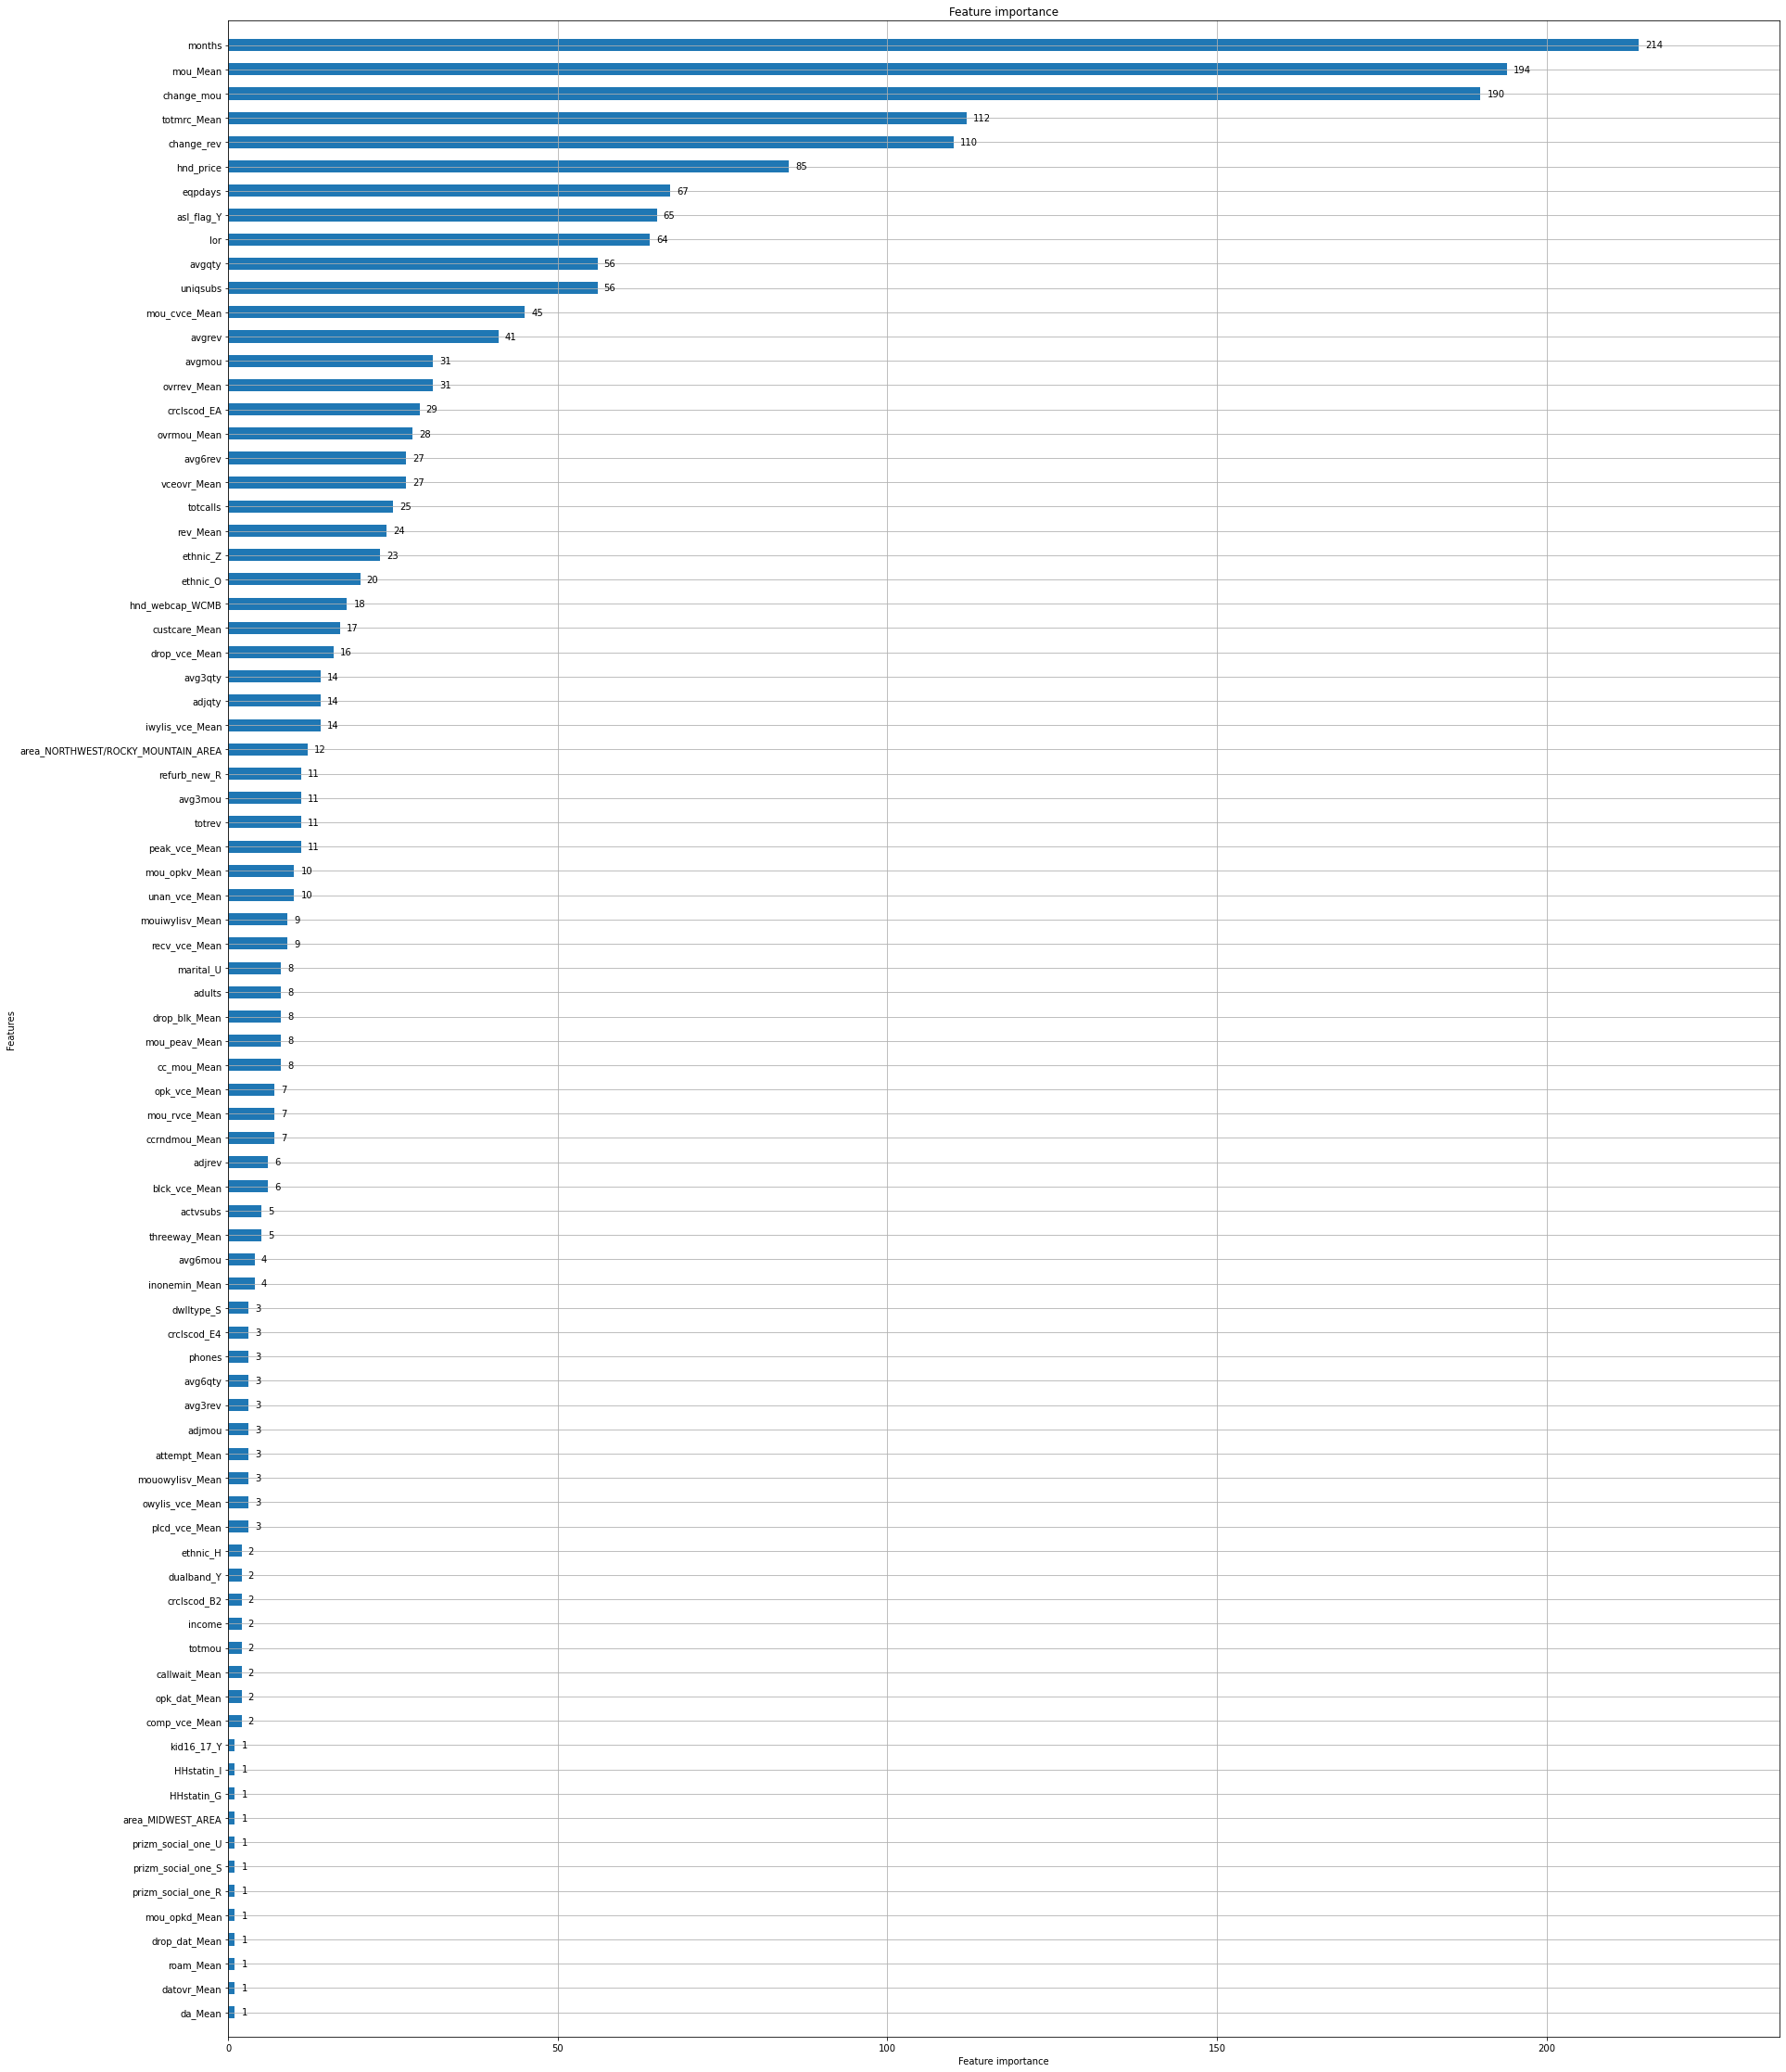

In [147]:
lgb.plot_importance(model, height=0.5, figsize=(30,40))

In [154]:
importances = pd.DataFrame(model.feature_importance(), index=X.columns, columns=['importance'])
importances.sort_values(by='importance', ascending=False).head(30)

importance
months                                     214
mou_Mean                                   194
change_mou                                 190
totmrc_Mean                                112
change_rev                                 110
hnd_price                                   85
eqpdays                                     67
asl_flag_Y                                  65
lor                                         64
avgqty                                      56
uniqsubs                                    56
mou_cvce_Mean                               45
avgrev                                      41
ovrrev_Mean                                 31
avgmou                                      31
crclscod_EA                                 29
ovrmou_Mean                                 28
vceovr_Mean                                 27
avg6rev                                     27
totcalls                                    25
rev_Mean                                    24
ethnic_Z                                    23
ethnic_O                                    20
hnd_webcap_WCMB                             18
custcare_Mean                               17
drop_vce_Mean                               16
adjqty                                      14
avg3qty                                     14
iwylis_vce_Mean                             14
area_NORTHWEST/ROCKY MOUNTAIN AREA          12

重要度の高い特徴量をいくつか検討してみる。

#### months（サービス利用開始からの総月数）

In [160]:
df['months'].describe()

count    100000.000000
mean         18.833990
std           9.655794
min           6.000000
25%          11.000000
50%          16.000000
75%          24.000000
max          61.000000
Name: months, dtype: float64

<AxesSubplot:ylabel='Frequency'>

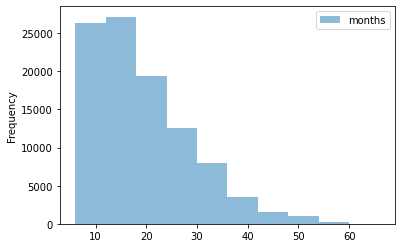

In [186]:
bins_list = [6, 12, 18, 24, 30, 36, 42, 48, 54, 60, 66]
df['months'].plot.hist(bins=bins_list, alpha=0.5, legend=True)

In [187]:
df['months_bins'] = pd.cut(df['months'], bins=bins_list, right=False)
df['months_bins'].value_counts(sort=False)

[6, 12)     26410
[12, 18)    27176
[18, 24)    19396
[24, 30)    12538
[30, 36)     8014
[36, 42)     3557
[42, 48)     1613
[48, 54)     1010
[54, 60)      274
[60, 66)       12
Name: months_bins, dtype: int64

解約率が全体でならすと、50%というのは高すぎるため、churn_rateが約50％となるように、ランダムサンプリングされたと仮定する。

このとき、年齢分布は母数分布の年齢分布とほぼ同じような形状と仮定できる。
その場合、このヒストグラムは契約が1年以上経過すると、解約件数が増え、どんどんと解約されていくように捉えることができる。

横軸をmonths、縦軸をchurn=1の割合の折れ線グラフを描いてみる

In [157]:
df.groupby(['churn'])['months'].mean()

churn
0    18.633074
1    19.038457
Name: months, dtype: float64

In [158]:
df.groupby(['churn'])['months'].median()

churn
0    16
1    17
Name: months, dtype: int64

中央値と平均値を比べる限り、解約の有無にほとんど影響はなさそう。

churn
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: months, dtype: object

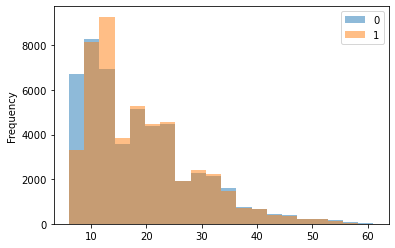

In [159]:
df.groupby('churn')['months'].plot.hist(bins=20, alpha=0.5, legend=True)

In [193]:
pd.set_option('display.max_rows', None)

In [198]:
df.groupby('months')['churn'].mean()

months
6     0.383784
7     0.332597
8     0.309549
9     0.287998
10    0.402736
11    0.651264
12    0.618598
13    0.554415
14    0.530316
15    0.523598
16    0.510278
17    0.515549
18    0.509934
19    0.492426
20    0.521692
21    0.493401
22    0.500797
23    0.516975
24    0.514813
25    0.482253
26    0.493520
27    0.509825
28    0.521036
29    0.501404
30    0.523077
31    0.500286
32    0.530988
33    0.497175
34    0.485887
35    0.489985
36    0.466916
37    0.487321
38    0.474245
39    0.506667
40    0.477612
41    0.507042
42    0.474074
43    0.466667
44    0.457831
45    0.446097
46    0.472727
47    0.480769
48    0.477477
49    0.479821
50    0.469880
51    0.580420
52    0.477477
53    0.379310
54    0.414634
55    0.384615
56    0.358974
57    0.219512
58    0.400000
59    0.093750
60    0.200000
61    0.500000
Name: churn, dtype: float64

<AxesSubplot:xlabel='months'>

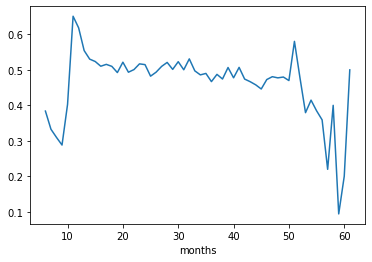

In [199]:
df.groupby('months')['churn'].mean().plot(kind='line')

解約率は契約11ヶ月〜12ヶ月で非常に高くなる傾向があるので、この時期に施策を打ち出すべき。

In [194]:
df.groupby('months')['churn'].value_counts(normalize=True, sort=False)

months  churn
6       0        0.616216
        1        0.383784
7       0        0.667403
        1        0.332597
8       0        0.690451
        1        0.309549
9       0        0.712002
        1        0.287998
10      0        0.597264
        1        0.402736
11      0        0.348736
        1        0.651264
12      0        0.381402
        1        0.618598
13      0        0.445585
        1        0.554415
14      0        0.469684
        1        0.530316
15      0        0.476402
        1        0.523598
16      0        0.489722
        1        0.510278
17      0        0.484451
        1        0.515549
18      0        0.490066
        1        0.509934
19      0        0.507574
        1        0.492426
20      0        0.478308
        1        0.521692
21      0        0.506599
        1        0.493401
22      0        0.499203
        1        0.500797
23      0        0.483025
        1        0.516975
24      0        0.485187
        1        0.51481

### mou_Mean(平均月間使用時間)

In [200]:
df.groupby(['churn'])['mou_Mean'].mean()

churn
0    543.206895
1    483.306417
Name: mou_Mean, dtype: float64

In [203]:
df.groupby("churn")['mou_Mean'].median()

churn
0    380.50
1    329.75
Name: mou_Mean, dtype: float64

月間使用時間が短い人ほど解約しやすい、ということがわかる。

churn
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: mou_Mean, dtype: object

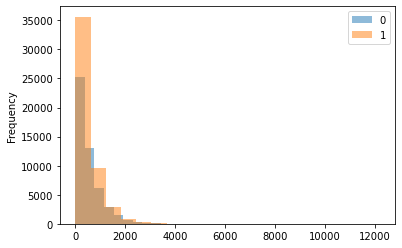

In [201]:
df.groupby(["churn"])["mou_Mean"].plot.hist(bins=20, alpha=0.5, legend=True)

In [204]:
df['mou_Mean'].isnull().sum()

357

欠損値はある程度ある。

In [206]:
from scipy import stats
s, pvalue = stats.mannwhitneyu(df[df["churn"]==1]["mou_Mean"]
                , df[df["churn"]==0]["mou_Mean"]
                ,alternative='two-sided')
pvalue < 0.05

ValueError: `x` and `y` must not contain NaNs.

In [77]:
df['dif_rev_totmrc'] = df['rev_Mean'] - df['totmrc_Mean']

### change_mou(対前3ヶ月との月間使用時間の変化)

In [208]:
df['change_mou'].isnull().sum()

891

欠損値が891もある。

In [222]:
max_size = 0
count = 0
churn_count = 0
for i in range(10000):
    null_size = df.iloc[i].isnull().sum()
    if null_size > max_size:
        max_size = null_size
    if null_size >= 10:
        count += 1
        churn_count += df.iloc[i]['churn']
print(max_size)
print(churn_count)
print(count)

22
313
537


In [223]:
313 /537

0.5828677839851024

欠損値が多いデータは、churnが悪くなる可能性が高い

In [224]:
df.groupby(['churn'])['change_mou'].mean()

churn
0    -5.344265
1   -22.759003
Name: change_mou, dtype: float64

In [225]:
df.groupby(['churn'])['change_mou'].median()

churn
0    -3.0
1   -10.0
Name: change_mou, dtype: float64

全体的に使用時間が減ってきている、かつ契約する人はその下げ幅が大きい傾向にある。

### totmrc_Mean（課金額）

In [226]:
df.groupby(['churn'])['totmrc_Mean'].mean()

churn
0    47.782378
1    44.543091
Name: totmrc_Mean, dtype: float64

In [227]:
df.groupby(['churn'])['totmrc_Mean'].median()

churn
0    44.9900
1    43.4175
Name: totmrc_Mean, dtype: float64

In [244]:
df['totmrc_Mean'].isnull().sum()

357

解約者の課金額は低い傾向にある

churn
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: totmrc_Mean, dtype: object

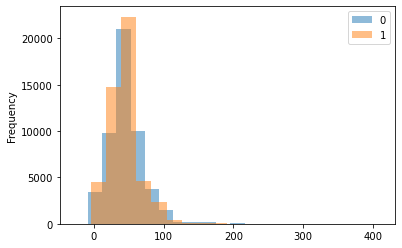

In [229]:
df.groupby(["churn"])["totmrc_Mean"].plot.hist(bins=20, alpha=0.5, legend=True)

In [235]:
df['totmrc_Mean_bins'] = pd.qcut(df['totmrc_Mean'], 20, duplicates='drop')
df['totmrc_Mean_bins'].value_counts(sort=False)

(-26.916, 10.0]     7490
(10.0, 18.52]       2475
(18.52, 29.99]     12981
(29.99, 30.0]       5873
(30.0, 32.49]       2354
(32.49, 37.408]     3711
(37.408, 39.99]     8808
(39.99, 41.28]      1240
(41.28, 44.99]     13470
(44.99, 47.005]     1385
(47.005, 49.99]     6429
(49.99, 52.49]      3758
(52.49, 59.99]     11948
(59.99, 69.99]      6334
(69.99, 74.99]      1491
(74.99, 84.99]      5029
(84.99, 409.99]     4867
Name: totmrc_Mean_bins, dtype: int64

In [238]:
df.groupby('totmrc_Mean_bins')['churn'].value_counts(normalize=True, sort=False)

totmrc_Mean_bins  churn
(-26.916, 10.0]   0        0.451135
                  1        0.548865
(10.0, 18.52]     0        0.512727
                  1        0.487273
(18.52, 29.99]    0        0.433711
                  1        0.566289
(29.99, 30.0]     0        0.459731
                  1        0.540269
(30.0, 32.49]     0        0.461342
                  1        0.538658
(32.49, 37.408]   0        0.468068
                  1        0.531932
(37.408, 39.99]   0        0.502157
                  1        0.497843
(39.99, 41.28]    0        0.565323
                  1        0.434677
(41.28, 44.99]    0        0.549443
                  1        0.450557
(44.99, 47.005]   0        0.498195
                  1        0.501805
(47.005, 49.99]   0        0.520765
                  1        0.479235
(49.99, 52.49]    0        0.501330
                  1        0.498670
(52.49, 59.99]    0        0.509709
                  1        0.490291
(59.99, 69.99]    0        0.564414
    

### change_rev（利用料金の変化）

In [242]:
print('平均')
display(df.groupby(['churn'])['change_rev'].mean())
print('中央値')
df.groupby(['churn'])['change_rev'].median()

平均


churn
0   -1.410195
1   -0.621263
Name: change_rev, dtype: float64

中央値


churn
0   -0.2925
1   -0.3150
Name: change_rev, dtype: float64

In [243]:
df['change_rev'].isnull().sum()

891

In [246]:
df['change_rev'].describe()

count    99109.000000
mean        -1.021067
std         50.363209
min      -1107.740000
25%         -7.365000
50%         -0.315000
75%          1.642500
max       9963.657500
Name: change_rev, dtype: float64

<AxesSubplot:xlabel='change_rev', ylabel='Density'>

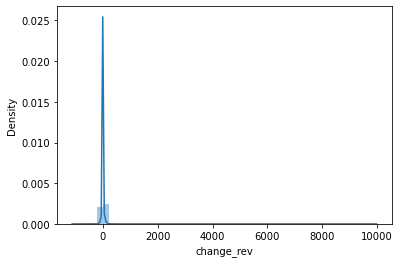

In [248]:
sns.distplot(df['change_rev'])

In [247]:
df['change_rev'].sort_values()

47315   -1.107740e+03
76358   -8.511050e+02
13041   -7.685750e+02
28626   -6.942650e+02
17142   -6.733550e+02
51699   -6.263575e+02
45847   -5.796350e+02
14964   -5.710825e+02
38885   -5.523875e+02
1810    -5.240600e+02
64220   -5.129250e+02
75077   -4.908350e+02
40923   -4.800325e+02
49098   -4.784850e+02
97604   -4.589725e+02
10651   -4.531475e+02
43552   -4.530650e+02
91223   -4.395025e+02
69926   -4.365050e+02
37679   -4.033800e+02
6371    -4.017750e+02
35651   -3.990250e+02
80697   -3.932375e+02
9620    -3.899325e+02
22225   -3.849100e+02
49220   -3.802750e+02
52671   -3.800150e+02
87694   -3.700850e+02
45758   -3.689775e+02
48355   -3.609950e+02
18545   -3.510625e+02
95607   -3.443925e+02
51173   -3.438550e+02
20687   -3.417967e+02
34759   -3.377875e+02
267     -3.243025e+02
9354    -3.240175e+02
77853   -3.224075e+02
54442   -3.182950e+02
49335   -3.179250e+02
67060   -3.109175e+02
43041   -3.078325e+02
53272   -3.072550e+02
68058   -3.000850e+02
2806    -2.977500e+02
69763   -2

churn
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: change_rev, dtype: object

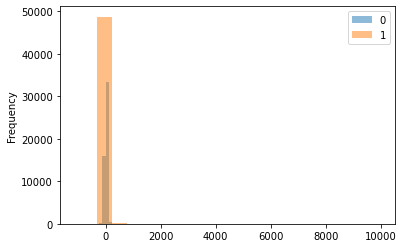

In [245]:
df.groupby(["churn"])["change_rev"].plot.hist(bins=20, alpha=0.5, legend=True)

外れ値を除く

In [255]:
q_975 = df['change_rev'].quantile(0.975)
q_975

78.45450000000005

In [256]:
q_025 = df['change_rev'].quantile(0.025)
q_025

-70.513

In [257]:
new_df = df[(df['change_rev'] < q_975) & (df['change_rev'] > q_025)][['change_rev', 'churn']]
new_df.head()

change_rev  churn
0    -18.9975      1
1     50.9875      0
2      0.0000      1
3      0.0000      0
4      0.0000      0

In [258]:
new_df.shape

(94153, 2)

<AxesSubplot:xlabel='change_rev', ylabel='Density'>

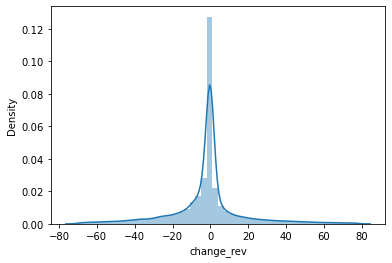

In [259]:
sns.distplot(new_df['change_rev'])

churn
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: change_rev, dtype: object

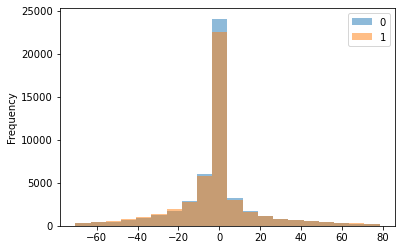

In [260]:
new_df.groupby(["churn"])["change_rev"].plot.hist(bins=20, alpha=0.5, legend=True)

### hnd_price(現在の携帯料金)

In [267]:
print('平均')
display(df.groupby(['churn'])['hnd_price'].mean())
print('中央値')
display(df.groupby(['churn'])['hnd_price'].median())
print('欠損値の数：', df['hnd_price'].isnull().sum())
print('統計量')
df['hnd_price'].describe()


平均


churn
0    108.129344
1     95.539523
Name: hnd_price, dtype: float64

中央値


churn
0    129.98999
1     99.98999
Name: hnd_price, dtype: float64

欠損値の数： 847
統計量


count    99153.000000
mean       101.875763
std         61.005671
min          9.989998
25%         29.989990
50%         99.989990
75%        149.989990
max        499.989990
Name: hnd_price, dtype: float64

In [264]:
df[df['hnd_price'].isnull()]['churn'].value_counts()

0    536
1    311
Name: churn, dtype: int64

In [265]:
311/847

0.36717827626918537

携帯料金がわからない人の解約率は明らかに低い。

仮説：携帯料金がわからない＝他社から変更した人。他社から変更した人は携帯を変えにくい。

### eqpdays（現在の機器の日数）

In [283]:
def feature_describe(df, col):
    print('平均')
    display(df.groupby(['churn'])[col].mean())
    print('中央値')
    display(df.groupby(['churn'])[col].median())
    print('欠損値の数：', df[col].isnull().sum())
    print('統計量')
    display(df[col].describe())

In [271]:
feature_describe('eqpdays')

平均


churn
0    363.280925
1    421.089524
Name: eqpdays, dtype: float64

中央値


churn
0    310.0
1    366.0
Name: eqpdays, dtype: float64

欠損値の数： 1
統計量


count    99999.000000
mean       391.932309
std        256.482193
min         -5.000000
25%        212.000000
50%        342.000000
75%        530.000000
max       1823.000000
Name: eqpdays, dtype: float64

In [276]:
df['days'] = df['months'] * 30
df[['days', 'eqpdays']].head(20)
df['days-eqpdays'] = abs(df['days'] - df['eqpdays'])

In [277]:
feature_describe('days-eqpdays')

平均


churn
0    200.057418
1    155.148804
Name: days-eqpdays, dtype: float64

中央値


churn
0    18.0
1    17.0
Name: days-eqpdays, dtype: float64

欠損値の数： 1
統計量


count    99999.000000
mean       177.799588
std        276.086766
min          0.000000
25%          7.000000
50%         17.000000
75%        289.000000
max       1760.000000
Name: days-eqpdays, dtype: float64

### asl_flagY(アカウントの使用限度額)
asl_flagはYesかNoの２択。

In [284]:
feature_describe(df2, 'asl_flag_Y')

平均


churn
0    0.163210
1    0.115088
Name: asl_flag_Y, dtype: float64

中央値


churn
0    0
1    0
Name: asl_flag_Y, dtype: uint8

欠損値の数： 0
統計量


count    100000.000000
mean          0.139360
std           0.346324
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: asl_flag_Y, dtype: float64

### lor（居住年数）

In [286]:
feature_describe(df, 'lor')

平均


churn
0    6.383884
1    5.960302
Name: lor, dtype: float64

中央値


churn
0    5.0
1    5.0
Name: lor, dtype: float64

欠損値の数： 30190
統計量


count    69810.000000
mean         6.177238
std          4.735267
min          0.000000
25%          2.000000
50%          5.000000
75%          9.000000
max         15.000000
Name: lor, dtype: float64

居住年数が長いほど比較的契約率が少ない

In [287]:
df[df['lor'].isnull()]['churn'].value_counts()

1    15505
0    14685
Name: churn, dtype: int64

In [288]:
df[df['lor'].notnull()]['churn'].value_counts()

0    35753
1    34057
Name: churn, dtype: int64

### avgqty（顧客生涯の平均月間通話回数）

In [291]:
feature_describe(df, 'avgqty')

平均


churn
0    177.505869
1    169.533305
Name: avgqty, dtype: float64

中央値


churn
0    128.50
1    126.53
Name: avgqty, dtype: float64

欠損値の数： 0
統計量


count    100000.000000
mean        173.554507
std         167.824576
min           0.000000
25%          64.090000
50%         127.500000
75%         228.570000
max        3017.110000
Name: avgqty, dtype: float64

churn
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: avgqty, dtype: object

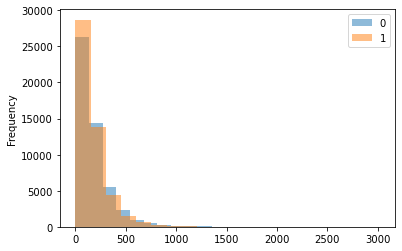

In [293]:
df.groupby(["churn"])["avgqty"].plot.hist(bins=20, alpha=0.5, legend=True)

In [294]:
q_95 = df['avgqty'].quantile(0.95)
new_df2 = df[df['avgqty'] < q_95][['avgqty', 'churn']]
new_df2.head()

avgqty  churn
0   32.69      1
1  265.89      0
2  140.86      1
3   30.81      0
4   79.50      0

churn
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: avgqty, dtype: object

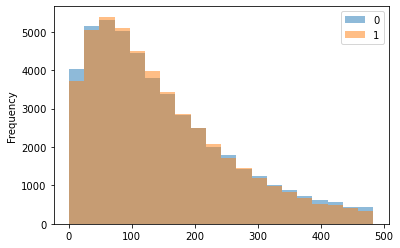

In [295]:
new_df2.groupby(["churn"])["avgqty"].plot.hist(bins=20, alpha=0.5, legend=True)


### uniqsubs（世帯内の契約数）

In [297]:
feature_describe(df, 'uniqsubs')

平均


churn
0    1.505631
1    1.591401
Name: uniqsubs, dtype: float64

中央値


churn
0    1
1    1
Name: uniqsubs, dtype: int64

欠損値の数： 0
統計量


count    100000.000000
mean          1.548140
std           1.075255
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max         196.000000
Name: uniqsubs, dtype: float64

In [298]:
df['uniqsubs'].value_counts(ascending=False).head(10)

1     61966
2     27556
3      6579
4      2556
5       835
6       315
7       111
8        40
9        20
10        9
Name: uniqsubs, dtype: int64

In [300]:
df['uniqsubs'].sort_values(ascending=False).head(15)

45772    196
38762     18
32531     13
77452     13
85417     12
68786     12
10717     12
95128     12
13716     11
58560     11
82831     11
78698     11
40330     11
35493     10
86268     10
Name: uniqsubs, dtype: int64

In [302]:
df['uniqsubs'].isnull().sum()

0

In [305]:
df[df['uniqsubs'] >= 10][['uniqsubs', 'churn']]

uniqsubs  churn
10717        12      0
13716        11      1
27058        10      1
32531        13      1
35493        10      1
38762        18      1
40330        11      1
45772       196      1
58560        11      0
67195        10      0
68786        12      1
73861        10      1
77452        13      1
78698        11      1
78933        10      1
80213        10      0
82831        11      1
85417        12      0
86268        10      1
93024        10      1
94930        10      1
95128        12      0

### 別のモデル

In [307]:
df3 = df.copy()
df3 = pd.get_dummies(df3, drop_first=True, columns = encoding_col, prefix = encoding_col)
df3.drop("Customer_ID", axis=1, inplace=True)

In [308]:
df3['dif_rev_totmrc'] = df3['rev_Mean'] - df3['totmrc_Mean']
df3['vce_blk_rate'] = 0
df3.loc[ df3['plcd_vce_Mean'] > 0, 'vce_blk_rate'] = df3['blck_vce_Mean'] / df3['plcd_vce_Mean']

df3['vce_drp_rate'] = 0
df3.loc[ df3['plcd_vce_Mean'] > 0, 'vce_drp_rate'] = df3['drop_vce_Mean'] / df3['plcd_vce_Mean']

df3['dat_blk_rate'] = 0
df3.loc[ df3['plcd_dat_Mean'] > 0, 'dat_blk_rate'] = df3['blck_dat_Mean'] / df3['plcd_dat_Mean']

df3['dat_drp_rate'] = 0
df3.loc[ df3['plcd_dat_Mean'] > 0, 'dat_drp_rate'] = df3['drop_dat_Mean'] / df3['plcd_dat_Mean']

df3['vce_cmpt_rate'] = 0
df3.loc[ df3['plcd_vce_Mean'] > 0, 'vce_cmpt_rate'] = df3['comp_vce_Mean'] / df3['plcd_vce_Mean']

df3['dat_cmpt_rate'] = 0
df3.loc[ df3['plcd_dat_Mean'] > 0, 'dat_cmpt_rate'] = df3['comp_dat_Mean'] / df3['plcd_dat_Mean']

df3['tot_cmpt_rate'] = 0
df3.loc[ df3['attempt_Mean'] > 0, 'tot_cmpt_rate'] = df3['complete_Mean'] / df3['attempt_Mean']

df3['tot_drp_blk_rate'] = 0
df3.loc[ df3['attempt_Mean'] > 0, 'tot_drp_blk_rate'] = df3['drop_blk_Mean'] / df3['attempt_Mean']

df3['vce_dat_ratio'] = 0
df3.loc[ (df3['plcd_vce_Mean'] + df3['plcd_dat_Mean']) > 0, 'tot_drp_blk_rate'] = df3['plcd_vce_Mean'] /  (df3['plcd_vce_Mean'] + df3['plcd_dat_Mean'])

df3['diff_3mon_overall_mou'] = 0
df3.loc[ (df3['avgmou'] == df3['avgmou']) & (df3['avg3mou'] == df3['avg3mou']), 'diff_3mon_overall_mou'] = (df3['avg3mou'] - df3['avgmou']) / df3['avgmou']

df3['diff_3mon_overall_qty'] = 0
df3.loc[ (df3['avgqty'] == df3['avgqty']) & (df3['avg3qty'] == df3['avg3qty']), 'diff_3mon_overall_qty'] = (df3['avg3qty'] - df3['avgqty']) / df3['avgqty']

df3['diff_3mon_overall_rev'] = 0
df3.loc[ (df3['avgrev'] == df3['avgrev']) & (df3['avg3rev'] == df3['avg3rev']), 'diff_3mon_overall_rev'] = (df3['avg3rev'] - df3['avgrev']) / df3['avgrev']

df3['diff_6mon_overall_mou'] = 0
df3.loc[ (df3['avgmou'] == df3['avgmou']) & (df3['avg6mou'] == df3['avg6mou']), 'diff_6mon_overall_mou'] = (df3['avg6mou'] - df3['avgmou']) / df3['avgmou']

df3['diff_6mon_overall_qty'] = 0
df3.loc[ (df3['avgqty'] == df3['avgqty']) & (df3['avg6qty'] == df3['avg6qty']), 'diff_6mon_overall_qty'] = (df3['avg6qty'] - df3['avgqty']) / df3['avgqty']

df3['diff_6mon_overall_rev'] = 0
df3.loc[ (df3['avgrev'] == df3['avgrev']) & (df3['avg6rev'] == df3['avg6rev']), 'diff_6mon_overall_rev'] = (df3['avg6rev'] - df3['avgrev']) / df3['avgrev']

df3['total_nulls'] = 0
df3.loc[:, 'total_nulls'] = np.sum(pd.isnull(df3), axis=1)

df3['eqpdays_digitized'] = np.digitize(df3['eqpdays'], bins=[-10, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330, 360, 390, 5000])

In [309]:
from sklearn.model_selection import train_test_split
import lightgbm as lgb
TARGET = "churn"
X = df3.drop(TARGET,axis=1) 
y = df3[TARGET] # 目的変数
# トレーニングデータ,テストデータの分割
X_train, X_valid, y_train, y_valid = train_test_split(X, y,test_size=0.2, random_state=0)

In [310]:
# 学習に使用するデータを設定
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_valid, y_valid, reference=lgb_train) 

# パラメータ
params = {
        'task': 'train',
        'boosting_type': 'gbdt',
        'objective': 'binary', # 目的 : 分類
        'metric': {'auc'},
         'num_leaves': 20,             
        'max_depth':5,
        'min_data_in_leaf': 3,        
        'num_iteration': 100,            
        'learning_rate':0.03,
        'num_boost_round':100,
         'early_stopping_rounds':20, 
}

# モデルの学習
model = lgb.train(params,
                  train_set=lgb_train, # トレーニングデータの指定
                  valid_sets=lgb_eval, # 検証データの指定
                  )

# テストデータの予測
y_pred = model.predict(X_valid)

[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 39665, number of negative: 40335
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.069833 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 19366
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 227
[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.495812 -> initscore=-0.016750
[LightGBM] [Info] Start training from score -0.016750
[1]	valid_0's auc: 0.647292
Training until validation scores don't improve for 20 rounds
[2]	valid_0's auc: 0.650606
[3]	valid_0's auc: 0.651406
[4]	valid_0's auc: 0.652958
[5]	valid_0's auc: 0.654182
[6]	valid_0's auc: 0.654853
[7]	valid_0's auc: 0.65546
[8]	valid_0's auc: 0.656496
[9]	valid_0's auc: 0.656784
[10]	valid_0's auc: 0.656866


ValueError: Circular reference detected

In [311]:
corr_mat = df3.corr(method='spearman')
corr_mat.loc[ corr_mat['churn'] == 1, 'churn'] = np.nan
dev = 1
s_6 = corr_mat['churn'].mean() + corr_mat['churn'].std() * dev
s__6 = corr_mat['churn'].mean() - corr_mat['churn'].std() * dev
print(s_6, s__6)

KeyboardInterrupt: 

### カテゴリカル変数

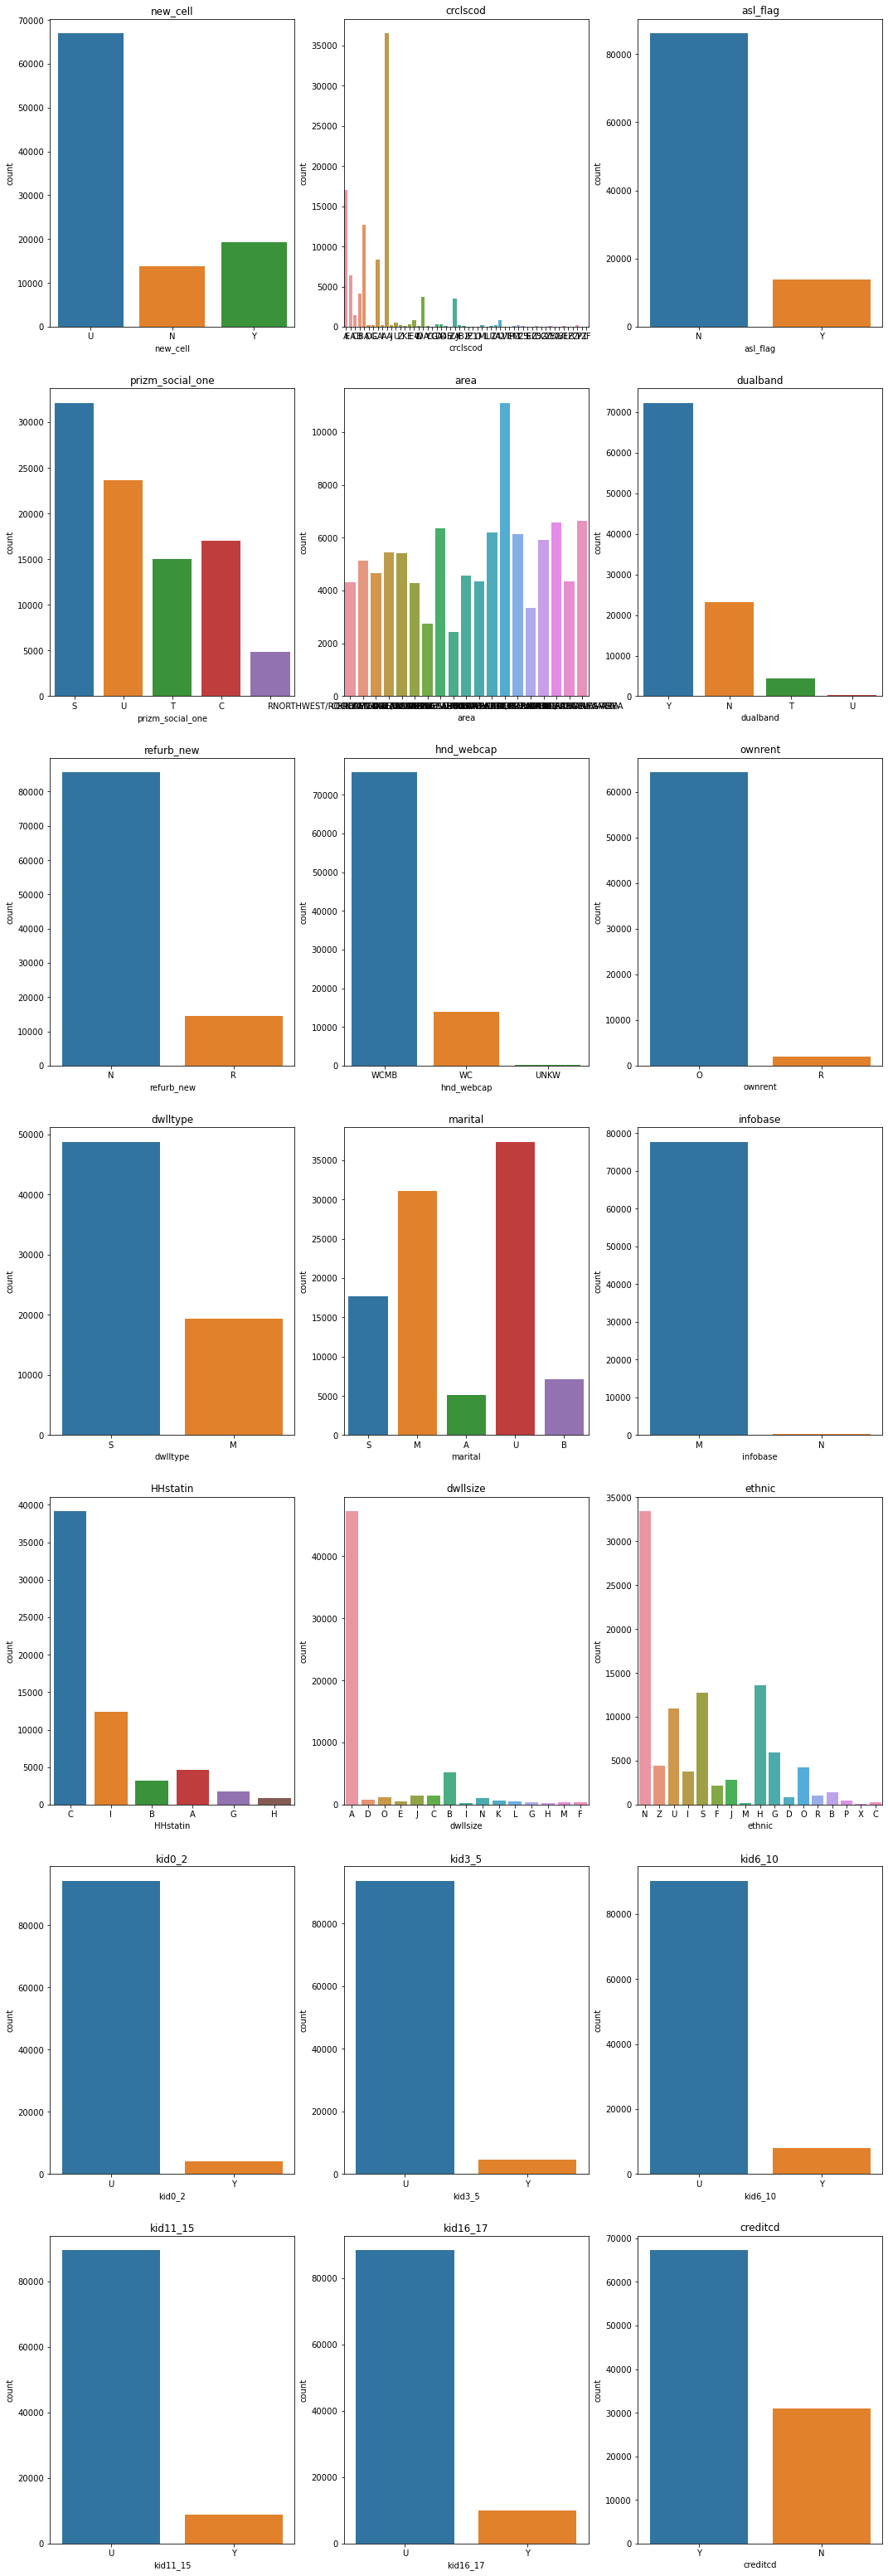

In [46]:
# cols = df.columns[df.dtypes.values == "object"]
f,ax=plt.subplots(7,3,figsize=(18,56))
for i in range(21):
  nrow = i//3
  ncol = i%3
  sns.countplot(obj_col[i], data=df, ax=ax[nrow, ncol])
  ax[nrow, ncol].set_title(obj_col[i])
plt.show()

In [50]:
# We dropped the columns that seem to have no significant contribution to the model.
df.drop(['numbcars','dwllsize','HHstatin','ownrent','dwlltype','lor','income','adults','prizm_social_one','infobase','crclscod'],axis=1,inplace=True)

In [14]:
df['hnd_webcap']=df['hnd_webcap'].fillna('UNKW') # Handset web capability

df['avg6qty']=df['avg6qty'].fillna(df['avg6qty'].mean()) # Billing adjusted total number of calls over the life of the customer
df['avg6rev']=df['avg6rev'].fillna(df['avg6rev'].mean()) # Average monthly revenue over the life of the customer
df['avg6mou']=df['avg6mou'].fillna(df['avg6mou'].mean()) # Average monthly minutes of use over the life of the customer

df['change_mou']=df['change_mou'].fillna(df['change_mou'].mean()) # Percentage change in monthly minutes of use vs previous three month average
df['change_rev']=df['change_rev'].fillna(df['change_rev'].mean()) # Percentage change in monthly revenue vs previous three month average

df['rev_Mean']=df['rev_Mean'].fillna(df['rev_Mean'].mean())
df['totmrc_Mean']=df['totmrc_Mean'].fillna(df['totmrc_Mean'].mean())
df['da_Mean']=df['da_Mean'].fillna(df['da_Mean'].mean())
df['ovrmou_Mean']=df['ovrmou_Mean'].fillna(df['ovrmou_Mean'].mean())
df['ovrrev_Mean']=df['ovrrev_Mean'].fillna(df['ovrrev_Mean'].mean())
df['vceovr_Mean']=df['vceovr_Mean'].fillna(df['vceovr_Mean'].mean())
df['datovr_Mean']=df['datovr_Mean'].fillna(df['datovr_Mean'].mean())
df['roam_Mean']=df['roam_Mean'].fillna(df['roam_Mean'].mean())
df['mou_Mean']=df['mou_Mean'].fillna(df['mou_Mean'].mean())

In [15]:
df.dropna(inplace=True)

In [16]:
sum(df.isnull().sum()>0)

0

In [51]:
columns_categories(df)

object( 14 ):
 ['new_cell', 'asl_flag', 'area', 'dualband', 'refurb_new', 'hnd_webcap', 'marital', 'ethnic', 'kid0_2', 'kid3_5', 'kid6_10', 'kid11_15', 'kid16_17', 'creditcd']
int( 9 ):
 ['churn', 'months', 'uniqsubs', 'actvsubs', 'totcalls', 'adjqty', 'avg3mou', 'avg3qty', 'avg3rev']
float( 66 ):
 ['rev_Mean', 'mou_Mean', 'totmrc_Mean', 'da_Mean', 'ovrmou_Mean', 'ovrrev_Mean', 'vceovr_Mean', 'datovr_Mean', 'roam_Mean', 'change_mou', 'change_rev', 'drop_vce_Mean', 'drop_dat_Mean', 'blck_vce_Mean', 'blck_dat_Mean', 'unan_vce_Mean', 'unan_dat_Mean', 'plcd_vce_Mean', 'plcd_dat_Mean', 'recv_vce_Mean', 'recv_sms_Mean', 'comp_vce_Mean', 'comp_dat_Mean', 'custcare_Mean', 'ccrndmou_Mean', 'cc_mou_Mean', 'inonemin_Mean', 'threeway_Mean', 'mou_cvce_Mean', 'mou_cdat_Mean', 'mou_rvce_Mean', 'owylis_vce_Mean', 'mouowylisv_Mean', 'iwylis_vce_Mean', 'mouiwylisv_Mean', 'peak_vce_Mean', 'peak_dat_Mean', 'mou_peav_Mean', 'mou_pead_Mean', 'opk_vce_Mean', 'opk_dat_Mean', 'mou_opkv_Mean', 'mou_opkd_Mean', 

In [18]:
numerical_features = ['months', 'uniqsubs', 'actvsubs', 'totcalls', 'avg3qty', 'avg3rev','rev_Mean', 'mou_Mean', 'totmrc_Mean', 'da_Mean', 'ovrmou_Mean', 'datovr_Mean', 
                      'roam_Mean', 'change_mou', 'change_rev', 'drop_vce_Mean', 'drop_dat_Mean', 'blck_vce_Mean', 'blck_dat_Mean', 'unan_vce_Mean', 'unan_dat_Mean', 
                      'plcd_vce_Mean', 'plcd_dat_Mean', 'recv_vce_Mean', 'recv_sms_Mean', 'custcare_Mean', 'ccrndmou_Mean', 'threeway_Mean', 'mou_cvce_Mean', 
                      'mou_cdat_Mean', 'mou_rvce_Mean', 'owylis_vce_Mean', 'mouowylisv_Mean', 'iwylis_vce_Mean', 'mouiwylisv_Mean', 'peak_vce_Mean', 'peak_dat_Mean', 
                      'mou_peav_Mean', 'mou_pead_Mean', 'opk_vce_Mean', 'opk_dat_Mean', 'mou_opkv_Mean', 'drop_blk_Mean', 'callfwdv_Mean', 'callwait_Mean', 'totmou', 
                      'totrev', 'avgrev', 'avgmou', 'avgqty', 'avg6mou', 'avg6rev', 'hnd_price', 'phones', 'models', 'truck', 'rv', 'forgntvl', 'eqpdays']

In [19]:
for i in numerical_features:    
    f_sqrt= (lambda x: np.sqrt(abs(x)) if (x>=1) or (x<=-1) else x)
    df[i] = df[i].apply(f_sqrt)

In [20]:
df.head()

rev_Mean   mou_Mean  totmrc_Mean  da_Mean  ovrmou_Mean  ovrrev_Mean  \
0  4.898724  14.807093     4.743416  0.24750          0.0          0.0   
2  4.121893   3.201562     4.121893  0.00000          0.0          0.0   
3  6.164414   2.738613     6.164414  0.00000          0.0          0.0   
4  7.431689  23.885142     8.484103  0.00000          0.0          0.0   
5  9.070557  36.224991     8.660254  1.11243          0.0          0.0   

   vceovr_Mean  datovr_Mean  roam_Mean  change_mou  ...  forgntvl  ethnic  \
0          0.0          0.0        0.0   12.539936  ...       0.0       N   
2          0.0          0.0        0.0    2.061553  ...       0.0       N   
3          0.0          0.0        0.0    1.224745  ...       0.0       U   
4          0.0          0.0        0.0    6.204837  ...       0.0       I   
5          0.0          0.0        0.0   12.519984  ...       0.0       U   

   kid0_2  kid3_5  kid6_10  kid11_15  kid16_17  creditcd    eqpdays  \
0       U       U        U         U         U         Y  19.000000   
2       U       Y        U         U         U         Y  38.781439   
3       Y       U        U         U         U         Y  42.567593   
4       U       U        U         U         U         Y  20.832667   
5       U       U        U         U         U         Y  21.400935   

   dif_rev_totmrc  
0          1.4975  
2          0.0000  
3          0.0000  
4        -16.7500  
5          7.2750  

[5 rows x 89 columns]

### 外れ値の検出

In [21]:
def detect_outliers(df,features):
    outlier_indices = []
    
    for c in features:
        # 1st quartile
        Q1 = np.percentile(df[c],25)
        # 3rd quartile
        Q3 = np.percentile(df[c],75)
        # IQR
        IQR = Q3 - Q1
        # Outlier step
        outlier_step = IQR * 1.5
        # detect outlier and their indeces
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        # store indeces
        outlier_indices.extend(outlier_list_col)
    
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)
    
    return outlier_indices

In [22]:
df.loc[detect_outliers(df,['uniqsubs', 'actvsubs'])]

rev_Mean   mou_Mean  totmrc_Mean   da_Mean  ovrmou_Mean  ovrrev_Mean  \
14     14.577894  44.401577     9.219002  1.492481    15.795569      99.8000   
28      9.920811  24.657656     9.746281  1.112430     6.442049      12.1950   
47      8.848022  29.180473     9.219544  0.000000     0.000000       0.0000   
76      5.103430  36.701499     3.162278  2.333452     8.602325      11.1000   
101    10.683281  40.617115     9.110434  1.316245     7.176350      14.6475   
...          ...        ...          ...       ...          ...          ...   
95533   8.722815  37.178623     9.082401  0.742500     0.250000       0.0975   
95574  13.001154  28.447320     8.743140  2.279803    16.132266     104.1000   
95640   9.433716  26.153394     7.437237  1.112430     8.746428      30.5550   
95658  11.498369  30.475400     6.124949  0.000000    10.344080      42.8000   
95666   7.170077  17.930421     7.900000  0.000000     0.000000       0.0000   

       vceovr_Mean  datovr_Mean  roam_Mean  change_mou  ...  forgntvl  ethnic  \
14          99.800     0.000000   5.957978   14.159802  ...       0.0       N   
28           7.125     2.251666   0.000000   23.727621  ...       0.0       G   
47           0.000     0.000000   0.000000   14.335271  ...       0.0       H   
76          11.100     0.000000   0.000000   32.863353  ...       0.0       N   
101          1.875     3.573863   0.000000   13.294736  ...       0.0       U   
...            ...          ...        ...         ...  ...       ...     ...   
95533        0.000     0.097500   0.257500   12.796484  ...       0.0       X   
95574      104.100     0.000000   0.790000    9.500000  ...       0.0       P   
95640       28.800     1.324764   0.390000    8.544004  ...       0.0       P   
95658       42.800     0.000000   0.000000   35.947879  ...       0.0       P   
95666        0.000     0.000000   0.000000   15.827192  ...       0.0       C   

       kid0_2  kid3_5  kid6_10  kid11_15  kid16_17  creditcd    eqpdays  \
14          U       U        Y         U         U         Y  14.106736   
28          U       U        U         U         U         Y  13.527749   
47          U       U        U         U         U         Y  12.288206   
76          U       U        U         U         U         Y  17.578396   
101         U       U        U         U         U         Y  17.492856   
...       ...     ...      ...       ...       ...       ...        ...   
95533       U       U        U         U         U         N  10.488088   
95574       U       U        U         U         U         N  13.527749   
95640       U       U        U         U         U         N  13.453624   
95658       U       U        U         U         U         N  13.453624   
95666       U       U        U         U         U         N  11.090537   

       dif_rev_totmrc  
14           127.5250  
28             3.4325  
47            -6.7125  
76            16.0450  
101           31.1325  
...               ...  
95533         -6.4025  
95574         92.5875  
95640         33.6825  
95658         94.6975  
95666        -11.0000  

[1348 rows x 89 columns]

In [23]:
# drop outliers
df = df.drop(detect_outliers(df,['uniqsubs', 'actvsubs']),axis = 0).reset_index(drop = True)

### 特徴量エンジニアリング

new_cell --> 3
crclscod --> 54
asl_flag --> 2
prizm_social_one --> 5
area --> 19
dualband --> 4
refurb_new --> 2
hnd_webcap --> 3
ownrent --> 2
dwlltype --> 2
marital --> 5
infobase --> 2
HHstatin --> 6
dwllsize --> 15
ethnic --> 17
kid0_2 --> 2
kid3_5 --> 2
kid6_10 --> 2
kid11_15 --> 2
kid16_17 --> 2
creditcd --> 2


In [53]:
display(df.shape)
display(df2.shape)

(100000, 89)

(100000, 128)

In [27]:
# Create correlation matrix
corr_matrix = df.corr().abs()
# print(corr_matrix)

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
# Drop features 
df.drop(df[to_drop], axis=1,inplace=True)

In [28]:
df.head()

rev_Mean   mou_Mean  totmrc_Mean  da_Mean  ovrmou_Mean  ovrrev_Mean  \
0  4.898724  14.807093     4.743416  0.24750          0.0          0.0   
1  4.121893   3.201562     4.121893  0.00000          0.0          0.0   
2  6.164414   2.738613     6.164414  0.00000          0.0          0.0   
3  7.431689  23.885142     8.484103  0.00000          0.0          0.0   
4  9.070557  36.224991     8.660254  1.11243          0.0          0.0   

   datovr_Mean  roam_Mean  change_mou  change_rev  ...  forgntvl  ethnic  \
0          0.0        0.0   12.539936    4.358612  ...       0.0       N   
1          0.0        0.0    2.061553    0.000000  ...       0.0       N   
2          0.0        0.0    1.224745    0.000000  ...       0.0       U   
3          0.0        0.0    6.204837    0.000000  ...       0.0       I   
4          0.0        0.0   12.519984    2.853945  ...       0.0       U   

   kid0_2  kid3_5  kid6_10  kid11_15  kid16_17  creditcd    eqpdays  \
0       U       U        U         U         U         Y  19.000000   
1       U       Y        U         U         U         Y  38.781439   
2       Y       U        U         U         U         Y  42.567593   
3       U       U        U         U         U         Y  20.832667   
4       U       U        U         U         U         Y  21.400935   

   dif_rev_totmrc  
0          1.4975  
1          0.0000  
2          0.0000  
3        -16.7500  
4          7.2750  

[5 rows x 84 columns]

In [29]:
c = df.corr()['churn'].abs()
sc = c.sort_values()
sc

rv               0.000265
totcalls         0.000552
recv_sms_Mean    0.001511
totmou           0.002480
forgntvl         0.004004
                   ...   
totmrc_Mean      0.070180
mou_Mean         0.071008
hnd_price        0.104810
eqpdays          0.117386
churn            1.000000
Name: churn, Length: 70, dtype: float64

In [30]:
a = dict(sc.tail(40))
b = a.keys()
print(sorted(b))

['avg3mou', 'avg3qty', 'avg6mou', 'avg6qty', 'avg6rev', 'avgmou', 'callwait_Mean', 'cc_mou_Mean', 'ccrndmou_Mean', 'change_rev', 'churn', 'comp_vce_Mean', 'custcare_Mean', 'dif_rev_totmrc', 'drop_blk_Mean', 'eqpdays', 'hnd_price', 'inonemin_Mean', 'iwylis_vce_Mean', 'models', 'months', 'mou_Mean', 'mou_cvce_Mean', 'mou_opkv_Mean', 'mou_peav_Mean', 'mou_rvce_Mean', 'mouiwylisv_Mean', 'mouowylisv_Mean', 'opk_vce_Mean', 'ovrmou_Mean', 'ovrrev_Mean', 'owylis_vce_Mean', 'peak_vce_Mean', 'phones', 'plcd_vce_Mean', 'recv_vce_Mean', 'threeway_Mean', 'totmrc_Mean', 'unan_vce_Mean', 'uniqsubs']


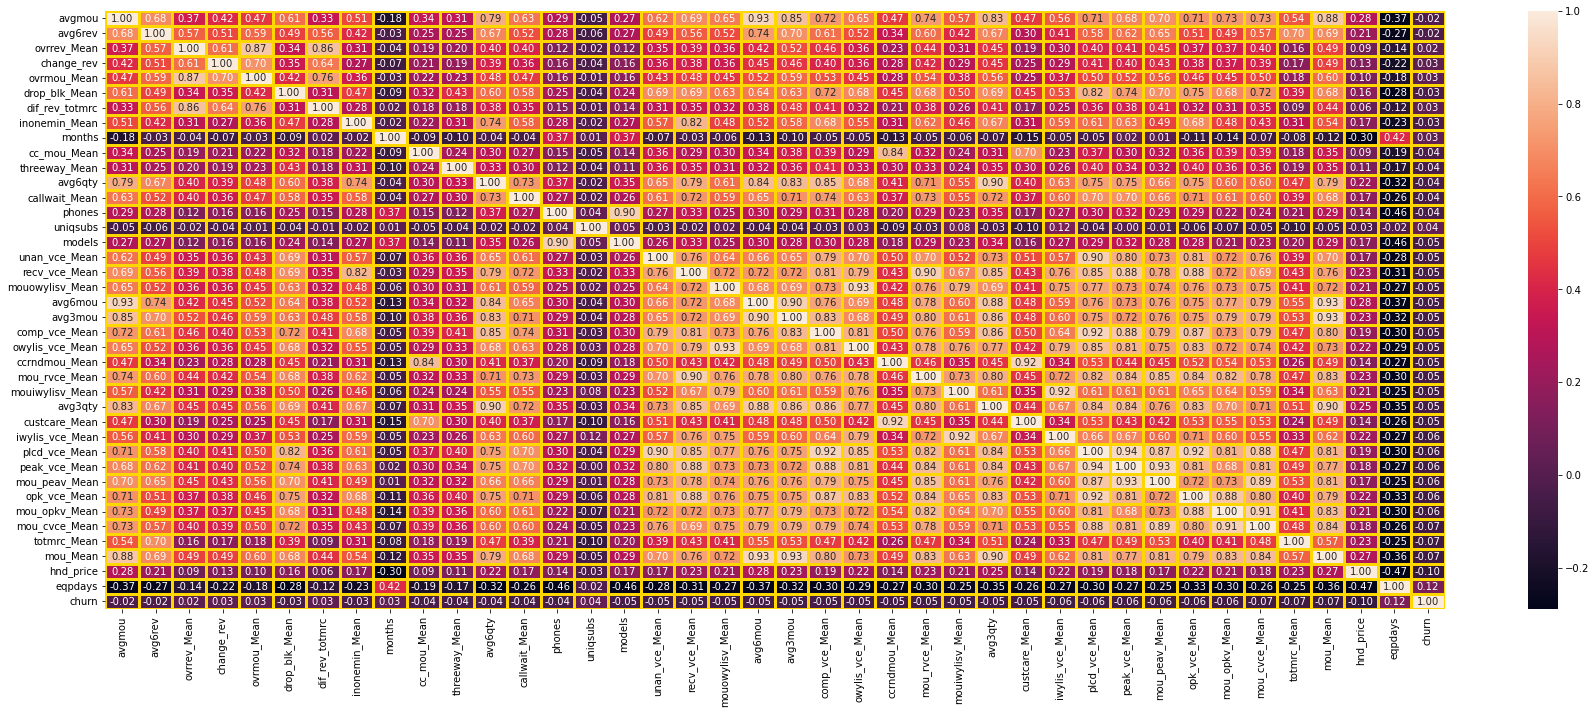

In [31]:
plt.figure(figsize=(30,11))
sns.heatmap(df2[b].corr(), annot = True, fmt = ".2f",robust=True,linewidths=1.3,linecolor = 'gold')
plt.show()

<AxesSubplot:>

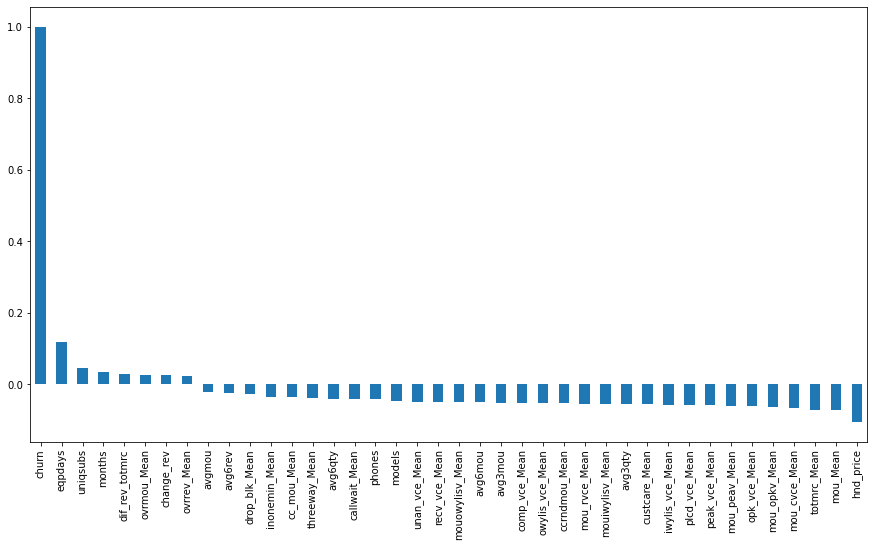

In [32]:
# Get Correlation of "churn" with other variables:
plt.figure(figsize=(15,8))
df2[b].corr()['churn'].sort_values(ascending = False).plot(kind='bar')

### モデル

In [84]:
# Import Machine learning algorithms
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

#Import metric for performance evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report,confusion_matrix, ConfusionMatrixDisplay

#Split data into train and test sets
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV

In [85]:
# dependent and independent variables were determined.
X = df2.drop('churn', axis=1)
y = df2['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train",len(X_train))
print("X_test",len(X_test))
print("y_train",len(y_train))
print("y_test",len(y_test))

X_train 80000
X_test 20000
y_train 80000
y_test 20000


In [70]:
X['change_rev'].fillna(((X['rev_Mean'] - X['avg3rev'])/X['avg3rev'])*100, inplace=True)
X['avg6rev'].fillna((100*X['avg3rev'])/(100+X['change_rev']), inplace=True)

In [62]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [86]:
# 学習に使用するデータを設定
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train) 

# パラメータ
params = {
        'task': 'train',
        'boosting_type': 'gbdt',
        'objective': 'binary', # 目的 : 分類
        'metric': {'auc'},
        'num_leaves': 20,             
        'max_depth':5,
        'min_data_in_leaf': 3,        
        'num_iteration': 100,            
        'learning_rate':0.03
}

# モデルの学習
model = lgb.train(params,
                  train_set=lgb_train, # トレーニングデータの指定
                  valid_sets=lgb_eval, # 検証データの指定
                  num_boost_round=100,
                  early_stopping_rounds=20
                  )

# テストデータの予測
y_pred = model.predict(X_test, num_iteration=model.best_iteration)

[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 39583, number of negative: 40417
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018744 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 15167
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 206
[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.494787 -> initscore=-0.020851
[LightGBM] [Info] Start training from score -0.020851
[1]	valid_0's auc: 0.639259
Training until validation scores don't improve for 20 rounds
[2]	valid_0's auc: 0.640233
[3]	valid_0's auc: 0.640364
[4]	valid_0's auc: 0.641019
[5]	valid_0's auc: 0.641554
[6]	valid_0's auc: 0.642474
[7]	valid_0's auc: 0.642724
[8]	valid_0's auc: 0

In [37]:
random_state = 42
classifier = [RandomForestClassifier(random_state = random_state),
             lgb.LGBMClassifier(random_state = random_state)]

rf_param_grid = {"max_features": [1,3,10],
                "min_samples_split":[2,3,10],
                "min_samples_leaf":[1,3,10],
                "bootstrap":[False],
                "n_estimators":[100,300],
                "criterion":["gini"]}

lgbm_params = {'n_estimators': [100, 500, 1000],
                'subsample': [0.6, 0.8, 1.0],
                'max_depth': [3, 4, 5],
                'learning_rate': [0.1,0.01,0.02],
                "min_child_samples": [5,10,20]}

classifier_param = [rf_param_grid,                   
                   lgbm_params]

In [38]:
cv_result = []
best_estimators = []
for i in range(len(Cclassifier)):
    clf = GridSearchCV(classifier[i], param_grid=classifier_param[i], cv = StratifiedKFold(n_splits = 10), scoring = "accuracy", n_jobs = -1,verbose = 1)
    clf.fit(X_train,y_train)
    cv_result.append(clf.best_score_)
    best_estimators.append(clf.best_estimator_)
    print(cv_result[i])

Fitting 10 folds for each of 54 candidates, totalling 540 fits


KeyboardInterrupt: 

In [ ]:
cv_results = pd.DataFrame({"Cross Validation Means":cv_result, "ML Models":[ "RandomForestClassifier","LGBMClassifier"]})

g = sns.barplot("Cross Validation Means", "ML Models", data = cv_results)
g.set_xlabel("Mean Accuracy")
g.set_title("Cross Validation Scores")